🔹 Logistic Regression
Accuracy: 0.710
MSE: 0.290, MAE: 0.290, R²: -0.408, ROC-AUC: 0.500
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       142
           1       0.00      0.00      0.00        58

    accuracy                           0.71       200
   macro avg       0.35      0.50      0.42       200
weighted avg       0.50      0.71      0.59       200



/var/folders/dd/8pjhv3c56250qthy4qm85xkm0000gp/T/ipykernel_81399/138396759.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].median(), inplace=True)
/var/folders/dd/8pjhv3c56250qthy4qm85xkm0000gp/T/ipykernel_81399/138396759.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

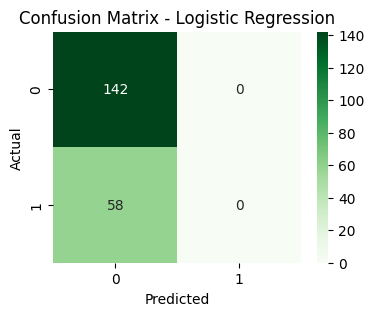

🔹 Decision Tree
Accuracy: 0.585
MSE: 0.415, MAE: 0.415, R²: -1.016, ROC-AUC: 0.499
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       142
           1       0.29      0.29      0.29        58

    accuracy                           0.58       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.59      0.58      0.59       200



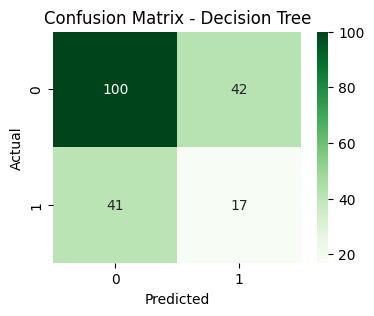

🔹 Random Forest
Accuracy: 0.665
MSE: 0.335, MAE: 0.335, R²: -0.627, ROC-AUC: 0.473
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80       142
           1       0.09      0.02      0.03        58

    accuracy                           0.67       200
   macro avg       0.39      0.47      0.41       200
weighted avg       0.52      0.67      0.57       200



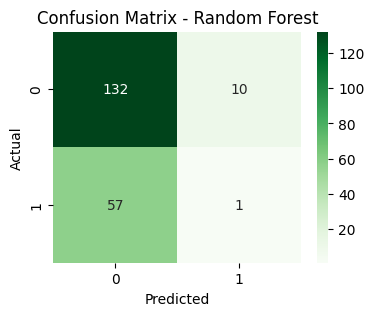


📊 Порівняння моделей:


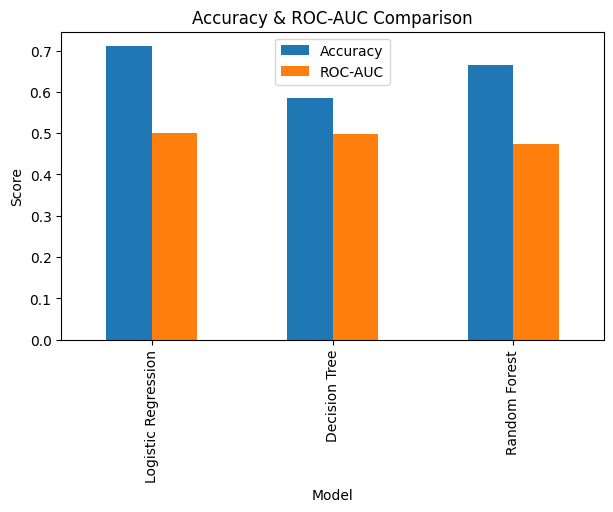

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    roc_auc_score
)

# ===============================================
# 1. Генерація синтетичних даних
# ===============================================
def generate_data():
    np.random.seed(42)
    n_samples = 1000
    data = {
        'customer_id': range(1, n_samples + 1),
        'age': np.random.randint(18, 70, n_samples),
        'income': np.random.randint(20000, 150000, n_samples),
        'credit_score': np.random.randint(300, 850, n_samples),
        'account_balance': np.random.randint(-5000, 100000, n_samples),
        'num_products': np.random.randint(1, 5, n_samples),
        'has_credit_card': np.random.choice([0, 1], n_samples),
        'is_active_member': np.random.choice([0, 1], n_samples),
        'country': np.random.choice(['Ukraine', 'Poland', 'Germany'], n_samples),
        'churn': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
    }
    df = pd.DataFrame(data)
    return df


# ===============================================
# 2. Обробка даних
# ===============================================
def data_preprocessing(df):
    df.loc[df.sample(50).index, 'income'] = np.nan
    df.loc[df.sample(30).index, 'credit_score'] = np.nan
    df['income'].fillna(df['income'].median(), inplace=True)
    df['credit_score'].fillna(df['credit_score'].median(), inplace=True)
    return df


# ===============================================
# 3. Інженерія ознак
# ===============================================
def feature_engineering(df):
    df['income_per_product'] = df['income'] / df['num_products']
    df['balance_to_income_ratio'] = df['account_balance'] / (df['income'] + 1)
    df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
    df['is_high_value'] = (df['account_balance'] > 50000).astype(int)

    df = pd.get_dummies(df, columns=['country'], prefix='country', drop_first=True)
    le = LabelEncoder()
    df['age_group_encoded'] = le.fit_transform(df['age_group'])
    return df


# ===============================================
# 4. Підготовка до моделювання
# ===============================================
def prepare_data(df):
    df = df.drop(['customer_id', 'age_group'], axis=1)
    X = df.drop('churn', axis=1)
    y = df['churn']
    return train_test_split(X, y, test_size=0.2, random_state=42)


# ===============================================
# 5. Тренування моделей і оцінка
# ===============================================
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
    }

    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Метрики класифікації
        acc = accuracy_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred)

        results.append({
            "Model": name,
            "Accuracy": acc,
            "MSE": mse,
            "MAE": mae,
            "R²": r2,
            "ROC-AUC": roc
        })

        print("=" * 60)
        print(f"🔹 {name}")
        print(f"Accuracy: {acc:.3f}")
        print(f"MSE: {mse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}, ROC-AUC: {roc:.3f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # Матриця плутанини
        plt.figure(figsize=(4, 3))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    # Порівняння моделей
    results_df = pd.DataFrame(results)
    print("\n📊 Порівняння моделей:")
    # display(results_df)

    # Візуалізація результатів
    results_df.set_index("Model")[["Accuracy", "ROC-AUC"]].plot(kind='bar', figsize=(7, 4))
    plt.title("Accuracy & ROC-AUC Comparison")
    plt.ylabel("Score")
    plt.show()


# ===============================================
# 6. Основна функція
# ===============================================
def main():
    df = generate_data()
    df = data_preprocessing(df)
    df = feature_engineering(df)
    X_train, X_test, y_train, y_test = prepare_data(df)
    evaluate_models(X_train, X_test, y_train, y_test)


# ===============================================
# 7. Виконання
# ===============================================
if __name__ == "__main__":
    main()
